# Basic two-objective sub-set selection optomization

In [22]:
from mcsss import MultiCriteriaSubSetSolver
import matplotlib.pyplot as plt
import numpy as np

## Create a toy problem to solve

In [23]:
# create the actual problem to be solved
np.random.seed(1)
n_items = 1000
x1 = np.random.uniform(0,1,n_items)
x2 = np.random.uniform(0,1,n_items)

obj1 = ('Max','random gaus 1',lambda x:np.sum(x1[x]))
obj2 = ('Max','random gaus 2',lambda x:np.sum(x2[x]))
objectives = [
    obj1,
    obj2
]

mcsss = MultiCriteriaSubSetSolver(
    objective_functions=objectives,
    ids=[f'id_{i+1}' for i in range(n_items)],
)

## Solve

In [20]:
k = 50 # pick 50
res = mcsss.solve(n_max = k) # run the optomizer
F = res.F * np.array([-1,-1]) # the optomizer does minimization, so to maximize we multiply by -1

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |      5 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      400 |      4 |  0.000000E+00 |  0.000000E+00 |  0.4320843491 |         ideal
     3 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.3314737843 |         ideal
     4 |      800 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0746359223 |         ideal
     5 |     1000 |      3 |  0.000000E+00 |  0.000000E+00 |  0.3522230481 |         ideal
     6 |     1200 |     10 |  0.000000E+00 |  0.000000E+00 |  0.2181757679 |         ideal
     7 |     1400 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0440338531 |             f
     8 |     1600 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0720948950 |         ideal
     9 |     1800 |      6 |  0.000000E+00 |  0.000000E+00 |  0.2605155110 |         ideal
    10 |     2000 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0112453866 |         ideal

## Draw the solutions space

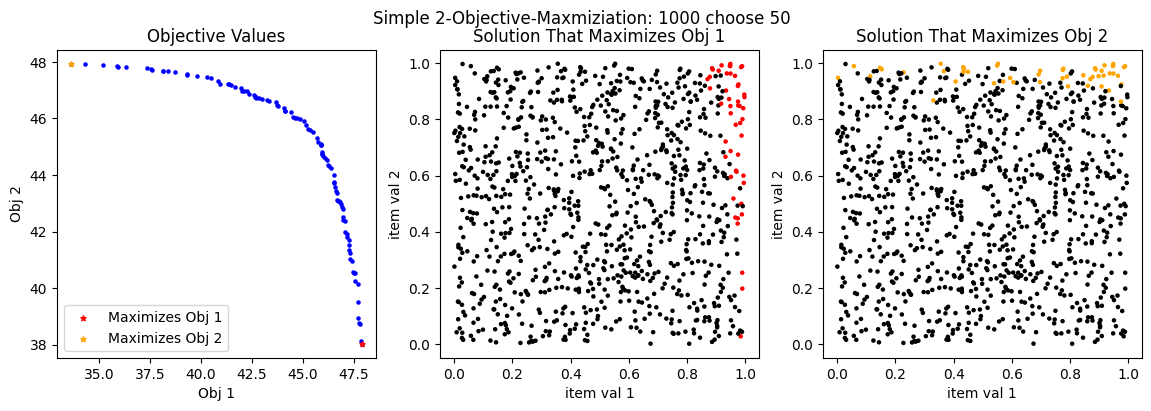

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3,figsize=(14, 4))

ax0.set_title('Objective Values')
ax0.scatter(F[:,0],F[:,1],s=5,color='blue')

obj_1_max_i = np.argmax(F[:,0])
obj_2_max_i = np.argmax(F[:,1])

ax0.scatter(F[obj_1_max_i,0],F[obj_1_max_i,1],s=15,color='red',marker='*',label='Maximizes Obj 1')
ax0.scatter(F[obj_2_max_i,0],F[obj_2_max_i,1],s=15,color='orange',marker='*',label='Maximizes Obj 2')
ax0.legend(loc='lower left')

ax0.set_xlabel('Obj 1')
ax0.set_ylabel('Obj 2')

obj1_colors = ['red' if x else 'k' for x in res.X[np.argmax(F[:,0]),:]]
ax1.scatter(x1,x2,s=5,c=obj1_colors)
ax1.set_xlabel('item val 1')
ax1.set_ylabel('item val 2')
ax1.set_title('Solution That Maximizes Obj 1')

obj2_colors = ['orange' if x else 'k' for x in res.X[np.argmax(F[:,1]),:]]
ax2.scatter(x1,x2,s=5,c=obj2_colors)
ax2.set_xlabel('item val 1')
ax2.set_ylabel('item val 2')
ax2.set_title('Solution That Maximizes Obj 2')

fig.suptitle(f'Simple 2-Objective-Maxmiziation: {n_items} choose {k}')
plt.show()